In [540]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [541]:
df = pd.read_pickle('test.pkl')
df.head()

,trajectory,interval_length,interval_value,well_type
0,0,0.010001,positive,shallow well
1,0,0.010001,negative,deep well
2,0,0.070007,positive,shallow well
3,0,2.450245,negative,deep well
4,0,0.010001,positive,shallow well


In [542]:
int_len = df[df['well_type'] == 'shallow well']['interval_length'].to_numpy()
data_clean = int_len[int_len > 0.15]
rate = 1/np.mean(data_clean)

In [543]:
def exp_cdf(x, rate):
    return 1 - np.exp(-rate * x)

In [544]:
x_transformed = exp_cdf(data_clean, rate)
x_sort_trans = np.sort(x_transformed)

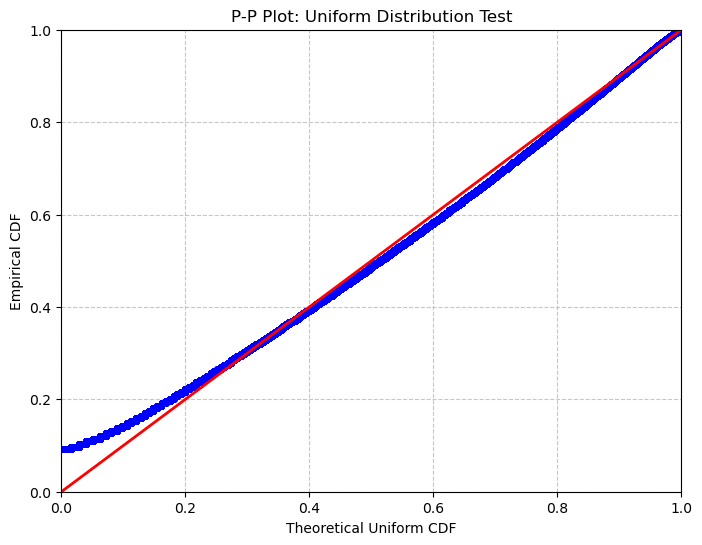

In [545]:
theoretical_points = np.linspace(0, 1, len(x_sort_trans))

plt.figure(figsize=(8, 6))
plt.plot(theoretical_points, x_sort_trans, 'bo', markersize=4)
plt.plot([0, 1], [0, 1], 'r-', linewidth=2)  # Diagonal reference line
plt.title('P-P Plot: Uniform Distribution Test')
plt.xlabel('Theoretical Uniform CDF')
plt.ylabel('Empirical CDF')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [552]:
stats.anderson(x_sort_trans, 'expon')

AndersonResult(statistic=24563.878748548334, critical_values=array([0.922, 1.078, 1.341, 1.606, 1.957]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0, scale=0.5034347915242429)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
stats.monte_carlo_test(data_clean, )

In [536]:
p_values = np.empty(shape=(1000,))
for i in range(1000):
    exponential_test = np.random.exponential(size=(100000,))
    p_values[i] = stats.cramervonmises(exponential_test, 'expon').pvalue